In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

alpha=2

(<matplotlib.axes._subplots.AxesSubplot at 0x14f920e0e88>,
 Text(0.5, 1.0, 'watermark'))

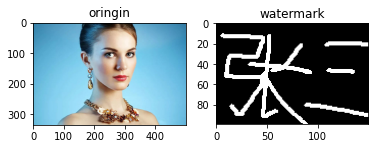

In [4]:
# 读取数据
# matplotlib.pyplot.imread会根据扩展名读取内容，对于png格式会读取alpha通道，
# dtype为float即值在[0, 1]之间，对于jpeg则是dtype=uint8,[0, 255],无法自定义，
# 所以应采用opencv读取图片并转为常规的RGB排序

im=np.double(cv2.cvtColor(cv2.imread('woman.png'),cv2.COLOR_BGR2RGB))/255
mark=np.double(cv2.cvtColor(cv2.imread('zhangsan.png'),cv2.COLOR_BGR2RGB))/255

plt.subplot(121),plt.imshow(im),plt.title('oringin')
plt.subplot(122),plt.imshow(mark),plt.title('watermark')

14262.0


(<matplotlib.axes._subplots.AxesSubplot at 0x14f921fb208>,
 Text(0.5, 1.0, 'encoded watermark'))

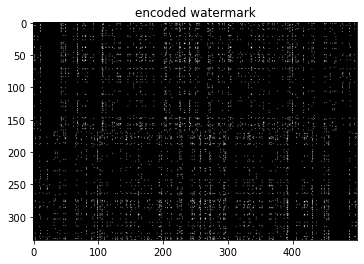

In [5]:
# 编码水印
im:np.ndarray
imsize=im.shape
TH=np.zeros((int(imsize[0]*0.5),imsize[1],imsize[2]))
TH1=TH.copy()
mark_size=mark.shape
TH1[0:mark_size[0],0:mark_size[1],:]=mark
M=np.random.permutation(int(imsize[0]*0.5))
N=np.random.permutation(imsize[1])
np.savez('encode',M=M,N=N)
for i in range(int(imsize[0]*0.5)):
    for j in range(imsize[1]):
        TH[i,j,:]=TH1[M[i],N[j],:]

# 对称
mark_=np.zeros(imsize)
mark_[0:int(imsize[0]*0.5),0:imsize[1],:]=TH
for i in range(int(imsize[0]*0.5)):
    for j in range(imsize[1]):
        mark_[imsize[0]-1-i,imsize[1]-1-j,:]=TH[i,j,:]

print(mark_.sum())
plt.subplot(111),plt.imshow(mark_),plt.title('encoded watermark')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x14f92470a08>,
 Text(0.5, 1.0, 'spectrum of watermarked image'))

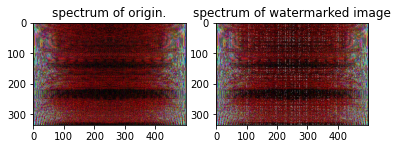

In [6]:
# 添加水印
fa=np.fft.fft2(im)
fa:np.ndarray
plt.subplot(121),plt.imshow(fa.real),plt.title('spectrum of origin.')
fb=fa+alpha*mark_
plt.subplot(122),plt.imshow(fb.real),plt.title('spectrum of watermarked image')


In [ ]:
# 水印图像逆变换
fao=np.fft.ifft2(fb)
fao_real=fao.real
plt.imsave('np_watered.png',fao_real.clip(0,1))
plt.subplot(121),plt.imshow(fao_real),plt.title('watermarked image.')
plt.subplot(122),plt.imshow(im),plt.title('origin image.')
# fao_real_clip=np.clip(fao_real,0,1)
# plt.imshow(fao_real_clip)
# plt.imsave('watermarked_image',fao_real)

In [ ]:
# 提取水印
fa2=np.fft.fft2(fao)
g=(fa2-fa)/alpha
gg=g.copy()
for i in range(0,int(imsize[0]*0.5)):
    for j in range(0,imsize[1]):
        gg[M[i],N[j],:]=g[i,j,:]

for i in range(0,int(imsize[0]*0.5)):
    for j in range(0,imsize[1]):
        gg[imsize[0]-1-i,imsize[1]-1-j,:]=gg[i,j,:]
print(g.sum())
print(gg.sum())
plt.imshow(gg.real)
